In [89]:
! conda install -c conda-forge seaborn -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/studio-lab-user/.conda/envs/default

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.11.2             |       hd8ed1ab_0           4 KB  conda-forge
    seaborn-base-0.11.2        |     pyhd8ed1ab_0         223 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         227 KB

The following NEW packages will be INSTALLED:

  seaborn            conda-forge/noarch::seaborn-0.11.2-hd8ed1ab_0
  seaborn-base       conda-forge/noarch::seaborn-base-0.11.2-pyhd8ed1ab_0



seaborn-0.11.2       | 4 KB      | #################

In [3]:
! conda install -c conda-forge scikit-learn -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/studio-lab-user/.conda/envs/default

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.1.0               |     pyhd8ed1ab_0         210 KB  conda-forge
    openssl-1.1.1q             |       h166bdaf_0         2.1 MB  conda-forge
    scikit-learn-1.1.1         |   py39h4037b75_0         8.2 MB  conda-forge
    threadpoolctl-3.1.0        |     pyh8a188c0_0          18 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        10.6 MB

The following NEW packages will be INSTALLED:

  joblib             conda-forge/no

In [4]:
# EDA and data handling
import numpy as np 
import pandas as pd 
import pickle

import os
import matplotlib.pyplot as plt

# Modeling
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics

In [5]:
sklearn.__version__

'1.1.1'

In [6]:
horror_flicks=pd.read_csv('../data/horror_flicks.csv')
horror_flicks.head()

,title,overview,release_date,year,top_genre
0,Psycho,When larcenous real estate clerk Marion Crane ...,1960-06-22,1960,Horror
1,Sleep Has Her House,The shadows of screams climb beyond the hills....,2017-01-01,2017,Horror
2,Antrum,"Rumored to have been lost, Antrum appears as a...",2018-10-14,2018,Horror
3,The Silence of the Lambs,Clarice Starling is a top student at the FBI's...,1991-02-01,1991,Horror
4,House of the Disappeared,"After 25 years of imprisonment for familicide,...",2017-04-05,2017,Horror


In [7]:
movies = pd.read_csv('../data/tmdb_movie_plots.csv')
movies.shape

(3410, 22)

In [8]:
movies=pd.concat([movies, horror_flicks])

In [9]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,top_genre,year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0,Action,2009
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0,Adventure,2007


In [27]:
movies = movies[['title', 'overview', 'year', 'top_genre']].copy()
movies=movies.reset_index(drop=True).copy()

In [28]:
 movies.isnull().sum()

title        0
overview     0
year         0
top_genre    0
dtype: int64

In [29]:
# remove unlabeled data
print(movies.shape)
movies=movies.dropna(how='any')
print(movies.shape)

(3885, 4)
(3885, 4)


In [30]:
# columns
movies.columns

Index(['title', 'overview', 'year', 'top_genre'], dtype='object')

### Preprocess text data

In [31]:
tvec = TfidfVectorizer(
#                        input='content', 
#                        encoding='utf-8', 
#                        decode_error='strict', 
                       strip_accents='unicode', 
                       lowercase=True, 
#                        preprocessor=None, 
                       # tokenizer='word_tokenize', 
#                        analyzer='word', 
                       stop_words='english', 
#                        token_pattern='(?u)\\b\\w\\w+\\b', 
#                        ngram_range=(1,3), 
#                        max_df=1.0, 
#                        min_df=1, 
#                        max_features=None, 
#                        vocabulary=True, 
#                        binary=False, 
#                        dtype=<class 'numpy.int64'>, 
#                        norm='l2', 
#                        use_idf=True, 
#                        smooth_idf=True, 
#                        sublinear_tf=False
)

In [37]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [33]:
tvec.fit(movies['overview'])

TfidfVectorizer(stop_words='english', strip_accents='unicode')

In [56]:
vectorization_example = tvec.transform([movies['overview'][0]])
vectorization_example

<1x18444 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [57]:
word_counts = pd.DataFrame(vectorization_example.sum(axis=0),
                       columns=tvec.get_feature_names())
word_counts.T

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
00,0.0
000,0.0
007,0.0
07am,0.0
10,0.0
...,...
zoom,0.0
zoozie,0.0
zorro,0.0
zuckerberg,0.0


In [58]:
# our example
example1=word_counts.head(1).T
example1[example1[0]>0]

,0
22nd,0.310100
alien,0.213973
century,0.209911
civilization,0.278183
dispatched,0.274036
following,0.212298
marine,0.255537
mission,0.181489
moon,0.270285
orders,0.260793


In [59]:
vectorization_example.shape

(1, 18444)

In [44]:
movies.shape

(3885, 4)

## Target

In [60]:
# check out the genres
movies['top_genre'].value_counts().head()

Drama        826
Comedy       789
Horror       690
Action       513
Adventure    212
Name: top_genre, dtype: int64

In [61]:
# create the target variable
choice='Horror'
movies['target']=0
movies.loc[movies['top_genre']==choice, 'target']=1
movies['target'].value_counts().sort_index()

0    3195
1     690
Name: target, dtype: int64

In [62]:
# examine a few
movies[movies['target']==1].sample(3)

,title,overview,year,top_genre,target
3457,Train to Busan,Martial law is declared when a mysterious vira...,2016,Horror,1
3440,The Parson's Widow,A young man is elected by a small village to b...,1920,Horror,1
3781,The Mummy,An ancient Egyptian priest named Imhotep is re...,1932,Horror,1


## Train-test split

In [63]:
np.random.seed(42) 
msk = np.random.rand(len(movies)) < 0.8
train = movies[msk]
test = movies[~msk]
print(len(train))
print(len(test))

3106
779


In [64]:
# How many in the test class?
print(test['target'].value_counts())

0    625
1    154
Name: target, dtype: int64


In [65]:
# How many in the train class?
print(train['target'].value_counts())

0    2570
1     536
Name: target, dtype: int64


In [66]:
# Undersample the majority class
undersample = train[train['target']==0].sample(600, random_state=42)
train_aug=train[train['target']==1].append(undersample)
train_aug['target'].value_counts()

/tmp/ipykernel_1763/4255554620.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_aug=train[train['target']==1].append(undersample)


0    600
1    536
Name: target, dtype: int64

In [67]:
# split into X and y
X_train=train_aug['overview']
X_test=test['overview']
y_train=train_aug['target']
y_test=test['target']

In [68]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1136
1136
779
779


In [69]:
# Note the difference in train and test. Don't fit on the test data! (d'oh)
tvec.fit(X_train)
Xvec_train = tvec.transform(X_train)
Xvec_test  = tvec.transform(X_test)
# We pickle tvec later on.

In [99]:
# Most common words
tfidf = pd.DataFrame(Xvec_train.sum(axis=0),
                       columns=tvec.get_feature_names())
tfidf.head(3)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,000,10,100,1000,10th,11,118,11th,12,1250,...,zeus,zhao,zigzags,zion,zombie,zombies,zone,zookeeper,zoolander,zoozie
0,2.071179,1.511169,0.455195,0.353119,0.154345,0.516441,0.187562,0.22764,1.251443,0.15046,...,0.231434,0.365867,0.206992,0.303444,1.804708,3.31723,0.195974,0.271268,0.168354,0.115394


In [100]:
print('Most common: \n \n', tfidf.T.sort_values(by=0,ascending=False).head(15))

Most common: 
 
                  0
young    16.759192
new      15.151250
life     14.911129
world    13.966447
family   13.628130
man      11.905908
woman    11.516572
home     10.514952
story    10.498337
house    10.293852
finds     9.629292
school    9.397085
friends   9.272976
years     9.181578
film      8.983899


In [101]:
Xvec_train.shape

(1136, 9366)

In [102]:
# # grid search parameters
# param_grid = {
# #         'n_estimators': [100, 'warn'], 
# #         'max_depth': [3, 4, 5, None],
# #         'min_samples_split': [2, 3, 4, 5],
# #         'min_samples_leaf': [1, 2, 3, 4, 5],         
# #         'max_features': [5, 10, 15, 'auto'], 
# #         'class_weight': [None],
# #         'criterion':['entropy', 'gini'],
#         }

In [103]:
# # conduct gridsearch
# grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, n_jobs = 1, cv=3, verbose=False)
# grid.fit(Xvec_train, y_train)
# print(grid.best_params_)

In [104]:
# # Instantiate model using those parameters
# my_model = grid.best_estimator_
# print(my_model)
# Model parameters
# print(my_model.get_params)

In [105]:
my_model=RandomForestClassifier()
my_model.fit(Xvec_train, y_train)

RandomForestClassifier()

In [74]:
# pickle the RF model
file = open(f'trained_rf_model.pkl', 'wb')
pickle.dump(my_model, file)
file.close()

## Predict & Evaluate

In [75]:
# Predict on the test data
y_preds=my_model.predict(Xvec_test)
print(len(y_test))
len(y_preds)

779


779

In [76]:
# Probabilities
y_probs = my_model.predict_proba(Xvec_test)[:,1]
len(y_probs)

779

In [77]:
# Accuracy score
metrics.accuracy_score(y_test, y_preds)

0.7881899871630296

In [78]:
# precision and recall 
print(metrics.classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       625
           1       0.47      0.55      0.51       154

    accuracy                           0.79       779
   macro avg       0.68      0.70      0.69       779
weighted avg       0.80      0.79      0.79       779



In [79]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_preds)
pd.DataFrame(cm, columns=['pred_0', 'pred_1'])

,pred_0,pred_1
0,529,96
1,69,85


In [80]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_preds).ravel()
print(tn, fp, fn, tp)

529 96 69 85


## ROCAUC score

In [81]:
from sklearn.metrics import roc_curve, auc

In [82]:
FPR = dict()
TPR = dict()
ROC_AUC = dict()
# For class 1 (has WNV), find the area under the curve:
FPR[1], TPR[1], _ = roc_curve(y_test, y_probs)
ROC_AUC[1] = auc(FPR[1], TPR[1])

In [83]:
# What is that ROC-AUC score?
print(ROC_AUC[1])
# Same but using the scikit default:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs)

0.7742181818181818


0.7742181818181818

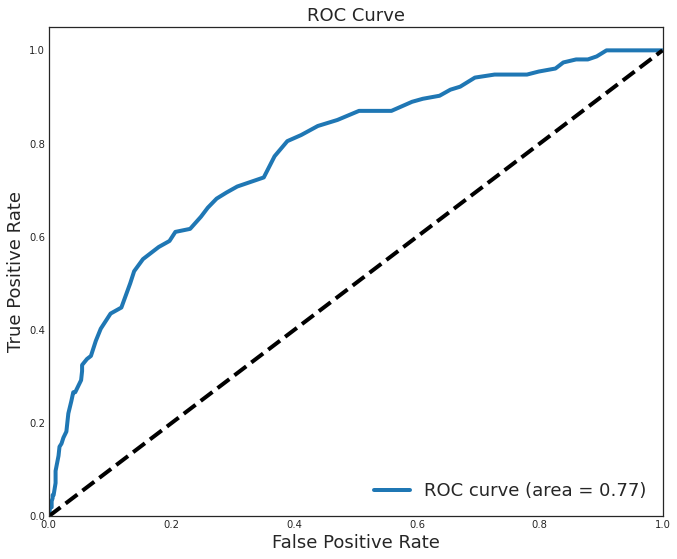

In [84]:
# Let's draw that:
plt.style.use('seaborn-white')
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC Curve', fontsize=18)
plt.legend(loc="lower right", fontsize=18);

## Feature Importance

In [85]:
df_x  = pd.DataFrame(Xvec_test.todense(),
             columns=tvec.get_feature_names())

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [86]:
fi = pd.DataFrame({
        'feature':df_x.columns,
        'importance':my_model.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)

In [87]:
# Features most associated with target
top20=pd.DataFrame(fi.sort_values('importance', ascending=False).head(20))
print(top20['feature'].values)
top20

['horror' 'soon' 'dr' 'dead' 'night' 'remote' 'house' 'life' 'high'
 'woman' 'evil' 'ghost' 'hospital' 'young' 'family' 'mysterious' 'body'
 'begins' 'mansion' 'blood']


,feature,importance
4021,horror,0.010143
7772,soon,0.006037
2553,dr,0.006036
2161,dead,0.005956
5731,night,0.005763
6894,remote,0.005497
4045,house,0.005237
4895,life,0.005180
3918,high,0.005097
9236,woman,0.004606


Text(0, 0.5, 'Feature Importance')

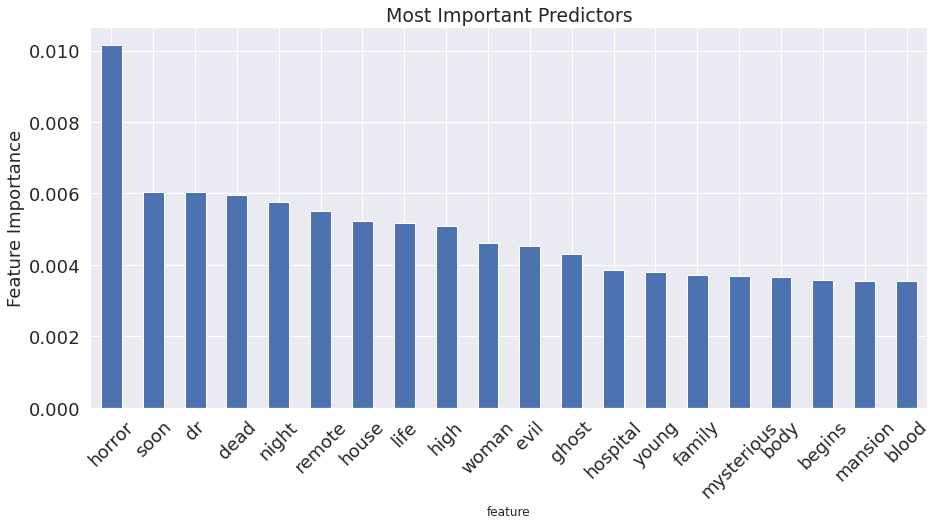

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid", color_codes=None)
# sns.palplot(sns.color_palette("RdBu", n_colors=7))
ax = top20.set_index('feature').plot(kind='bar', legend=False, fontsize=18,  figsize=(15, 7))
plt.xticks(rotation = 45,  fontsize=18)
plt.title('Most Important Predictors',  fontsize=19)
plt.yticks(rotation = 0,  fontsize=18)
plt.ylabel('Feature Importance', rotation=90,  fontsize=18)

In [91]:
# save that dataframe
top20.to_csv('top20.csv', index=False)

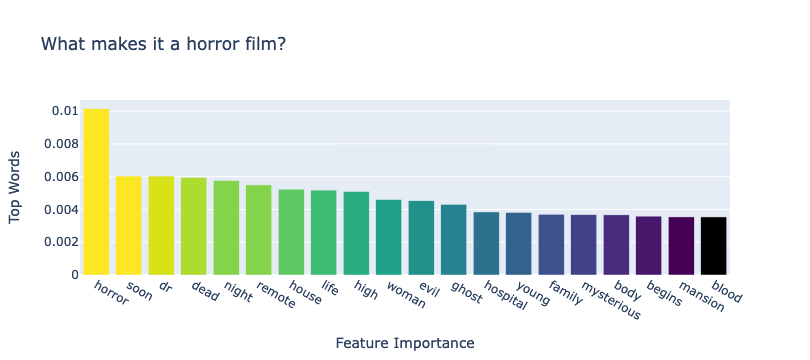

In [93]:
# Let's display that with Plotly.
init_notebook_mode(connected=True)
# import plotly.io as pio
import plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

# Define the color palette (19 colors).
Viridis= ['#440154', '#48186a', '#472d7b', '#424086', '#3b528b', '#33638d', '#2c728e', '#26828e', '#21918c', '#1fa088',
          '#28ae80', '#3fbc73', '#5ec962', '#84d44b', '#84d44b', '#addc30','#d8e219', '#fde725',  '#fde725']   

mydata = [go.Bar(
    x=top20['feature'],
    y=top20['importance'],
    marker=dict(color=Viridis[::-1])
)]

mylayout = go.Layout(
    title='What makes it a horror film?',
    xaxis = dict(title = 'Feature Importance'), 
    yaxis = dict(title = 'Top Words'), 

)
fig = go.Figure(data=mydata, layout=mylayout)
# pio.write_image(fig, '../images/logistic.png')
fig

In [94]:
# A confusion matrix tells us our false positives and false negatives:
matrix=metrics.confusion_matrix(y_test, y_preds)
cm=pd.DataFrame(matrix, columns=['predicted: no', 'predicted: yes'], index=['ground truth: no', 'ground truth: yes'])
cm=cm.reset_index(drop=False)
cm=cm.rename(columns={'index': f'n = {len(y_test)}'})

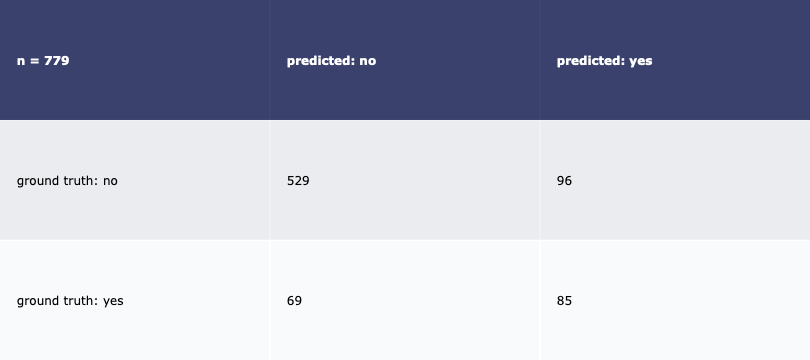

In [95]:
import plotly.figure_factory as ff
table = ff.create_table(cm)
iplot(table)

In [96]:
cm.to_csv('conf_matrix.csv', index=False)
cm

,n = 779,predicted: no,predicted: yes
0,ground truth: no,529,96
1,ground truth: yes,69,85


## Test on new data

In [97]:
# newdata = train[train['target']==1]['overview'].sample(1).values
newdata = ['this is a test this is just a test funny funny joke ha']
tvec_test=tvec.transform(newdata)
preds_test=my_model.predict(tvec_test)
preds_test

array([0])

In [106]:
# newdata = train[train['target']==1]['overview'].sample(1).values
newdata = ['horror dark night evil haunted house zombies']
tvec_test=tvec.transform(newdata)
preds_test=my_model.predict(tvec_test)
preds_test

array([1])

In [98]:
# pickle the vectorizer
file = open('vectorizer.pkl', 'wb')
pickle.dump(tvec, file)
file.close()